In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [6]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## Models

In [7]:
Y = data['Class'].to_numpy()

In [8]:
# Initialize the StandardScaler
transform = preprocessing.StandardScaler()

# Standardize the data in X
X = transform.fit_transform(X)

In [9]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [10]:
Y_test.shape

(18,)

In [12]:
# Define the parameters for GridSearchCV
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}

# Create a LogisticRegression object
lr = LogisticRegression()

# Create a GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the model
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [13]:
# Output the best parameters and best score
print("Tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("Accuracy on validation data: ", logreg_cv.best_score_)

Tuned hyperparameters (best parameters):  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on validation data:  0.8464285714285713


In [14]:
# Calculate accuracy on the test data
accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data: ", accuracy)

Accuracy on test data:  0.8333333333333334


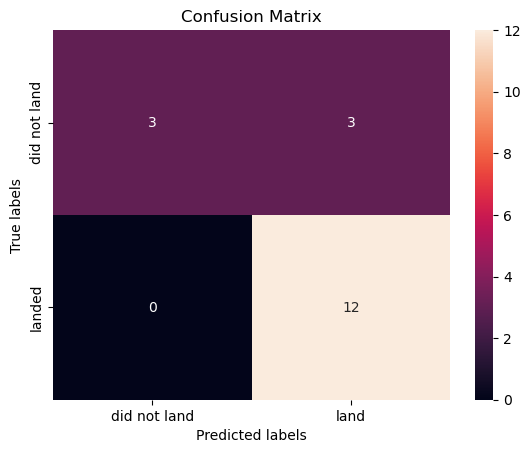

In [15]:
# Make predictions on the test data
yhat = logreg_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

In [16]:
# Define the parameters for GridSearchCV
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}

In [17]:
# Create an SVM object
svm = SVC()

# Create a GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the model
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [18]:
# Output the best parameters and best score
print("Tuned hyperparameters (best parameters): ", svm_cv.best_params_)
print("Accuracy on validation data: ", svm_cv.best_score_)

Tuned hyperparameters (best parameters):  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy on validation data:  0.8482142857142856


In [19]:
# Calculate accuracy on the test data
accuracy_svm = svm_cv.score(X_test, Y_test)
print("Accuracy on test data: ", accuracy_svm)

Accuracy on test data:  0.8333333333333334


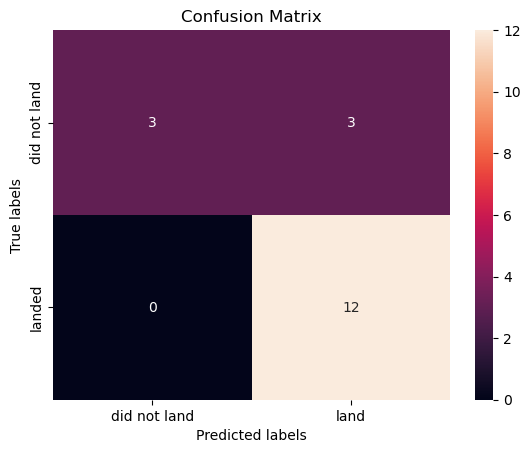

In [20]:
# Make predictions on the test data
yhat_svm = svm_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat_svm)

In [21]:
# Define the parameters for GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

In [22]:

# Create a DecisionTreeClassifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the model
tree_cv.fit(X_train, Y_train)

C:\Users\nabil\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nabil\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nabil\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\nabil\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 436, in _validate_params
    v

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [23]:
# Output the best parameters and best score
print("Tuned hyperparameters (best parameters): ", tree_cv.best_params_)
print("Accuracy on validation data: ", tree_cv.best_score_)

Tuned hyperparameters (best parameters):  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy on validation data:  0.8625


In [24]:
# Calculate accuracy on the test data
accuracy_tree = tree_cv.score(X_test, Y_test)
print("Accuracy on test data: ", accuracy_tree)

Accuracy on test data:  0.8333333333333334


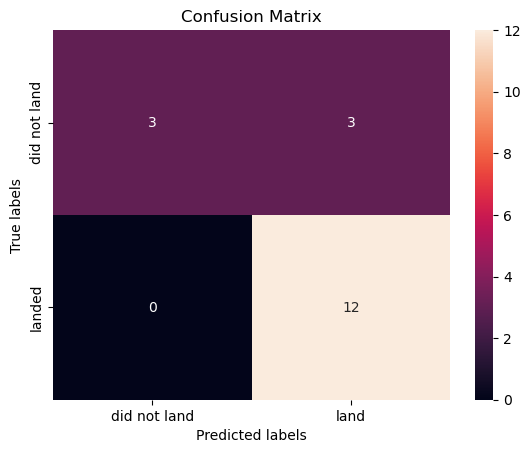

In [25]:
# Make predictions on the test data
yhat_tree = tree_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat_tree)

In [26]:
# Define the parameters for GridSearchCV
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [27]:
# Create a KNeighborsClassifier object
KNN = KNeighborsClassifier()

# Create a GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the model
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [28]:
# Output the best parameters and best score
print("Tuned hyperparameters (best parameters): ", knn_cv.best_params_)
print("Accuracy on validation data: ", knn_cv.best_score_)

Tuned hyperparameters (best parameters):  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy on validation data:  0.8482142857142858


In [29]:
# Calculate accuracy on the test data
accuracy_knn = knn_cv.score(X_test, Y_test)
print("Accuracy on test data: ", accuracy_knn)

Accuracy on test data:  0.8333333333333334


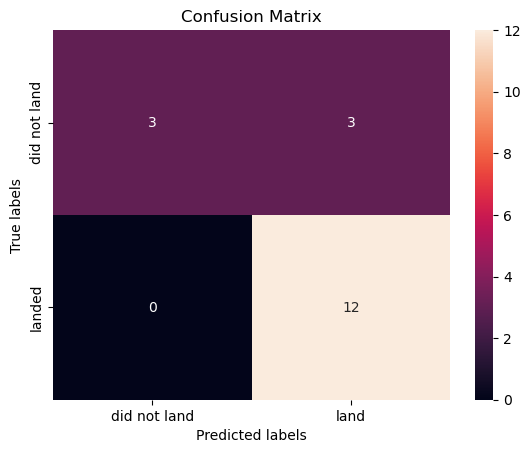

In [30]:

# Make predictions on the test data
yhat_knn = knn_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat_knn)

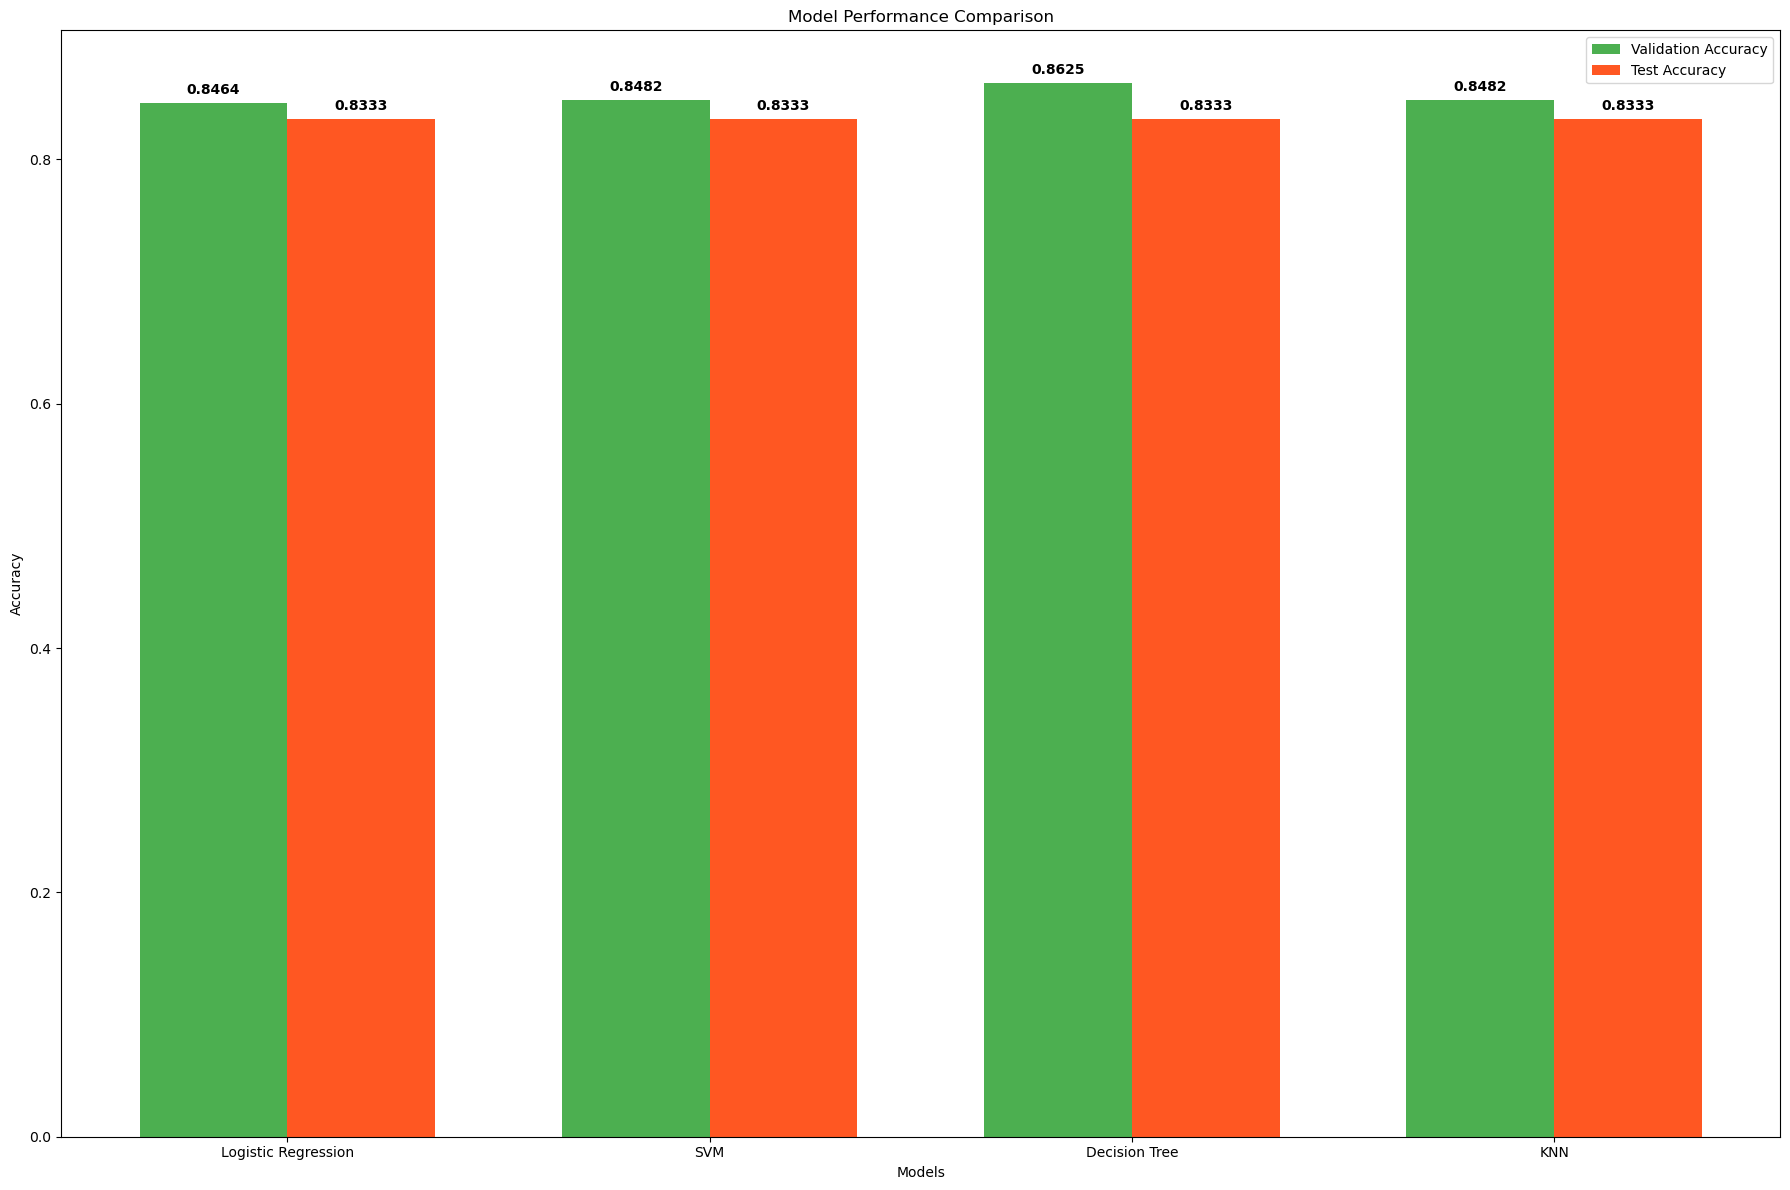

In [41]:
# Model names and their corresponding accuracy
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
validation_accuracy = [0.8464285714285713, 0.8482142857142856, 0.8625, 0.8482142857142858]
test_accuracy = [0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334]

# Plotting
fig, ax = plt.subplots(figsize=(18, 12))
bar_width = 0.35
index = range(len(models))

# Bar chart for validation and test accuracies with different colors
bar1 = ax.bar(index, validation_accuracy, bar_width, label='Validation Accuracy', color='#4CAF50')  # Green
bar2 = ax.bar([i + bar_width for i in index], test_accuracy, bar_width, label='Test Accuracy', color='#FF5722')  # Orange

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

# Display values on top of each bar with slight adjustments for spacing
for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), va='bottom', ha='center', fontweight='bold')

for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), va='bottom', ha='center', fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


Performance Comparison:

Validation Accuracy: The Decision Tree has the highest validation accuracy (86.25%), so it seems to fit the training data best.

the accuracy on the test data for all models is the same (83.33%). so in terms of generalization ability on the test data, they all performed equally well.

Conclusion: Although the Decision Tree achieved the highest validation accuracy, all models seem to have similar test performance, suggesting that they generalize similarly well to unseen data.